In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snspip
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [36]:
from fastparquet import ParquetFile
pf = ParquetFile('data/oil.parquet')
df = pf.to_pandas()
df.head()
# df2 = pf.to_pandas(['col1', 'col2'], categories=['col1'])

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [90]:
#descriptive statistics summary
df.describe()


,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [91]:
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


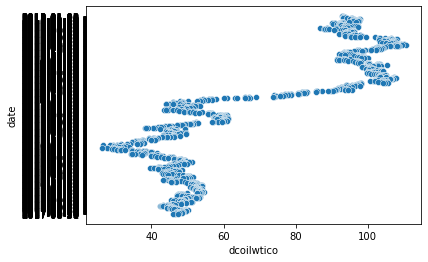

In [31]:

sns.scatterplot(data=df, 
                x="dcoilwtico",
                y="date")
plt.show()

In [72]:
import_file = 'data/oil.parquet'
df = pd.read_parquet(import_file)
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [73]:
df.loc[df['dcoilwtico'].isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [75]:
df.loc[df['dcoilwtico']<80]

,date,dcoilwtico
479,2014-11-03,78.77
480,2014-11-04,77.15
481,2014-11-05,78.71
482,2014-11-06,77.87
483,2014-11-07,78.71
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [65]:
df.loc[df['dcoilwtico']<28]

,date,dcoilwtico
796,2016-01-20,26.68
810,2016-02-09,27.96
811,2016-02-10,27.54
812,2016-02-11,26.19


# VRAAG Hoe krijg ik een gemiddelde olieprijs per jaar waarbij de NaN waarden gefilterd worden en niet meetellen voor deze gemiddelde olieprijs

In [38]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [39]:
import_file = 'data/holidays_events.parquet'
df = pd.read_parquet(import_file)
df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [136]:
#descriptive statistics summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [133]:
df.sort_values("date", ascending=True)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [103]:
print(type(df.date))


<class 'pandas.core.series.Series'>


In [105]:
df.loc[df['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [106]:
df['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [116]:
df.head(49)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [40]:
import_file = 'data/items.parquet'
df = pd.read_parquet(import_file)
df.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [147]:
df.shape

(4100, 4)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [155]:
df[ df['family'] == "GROCERY I"]

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
3,103520,GROCERY I,1028,0
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
...,...,...,...,...
4093,2131699,GROCERY I,1002,0
4094,2132163,GROCERY I,1040,0
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0


In [162]:
is_grocery = df["family"] == "GROCERY I"
is_class = df["class"] == 1045
df[is_class & is_grocery]

,item_nbr,family,class,perishable
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
174,217827,GROCERY I,1045,0
206,255202,GROCERY I,1045,0
276,305080,GROCERY I,1045,0
277,305081,GROCERY I,1045,0
444,404336,GROCERY I,1045,0
637,554049,GROCERY I,1045,0


In [118]:
#descriptive statistics summary
df.describe()

,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


In [122]:
df['perishable'].value_counts()

0    3114
1     986
Name: perishable, dtype: int64

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [126]:
df['class'].value_counts()

1016    133
1040    110
1124    100
1034     98
1122     81
       ... 
2103      1
6233      1
4212      1
4228      1
6155      1
Name: class, Length: 337, dtype: int64

In [127]:
print(df)

      item_nbr            family  class  perishable
0        96995         GROCERY I   1093           0
1        99197         GROCERY I   1067           0
2       103501          CLEANING   3008           0
3       103520         GROCERY I   1028           0
4       103665      BREAD/BAKERY   2712           1
...        ...               ...    ...         ...
4095   2132318         GROCERY I   1002           0
4096   2132945         GROCERY I   1026           0
4097   2132957         GROCERY I   1068           0
4098   2134058         BEVERAGES   1124           0
4099   2134244  LIQUOR,WINE,BEER   1364           0

[4100 rows x 4 columns]


In [128]:
df.values

array([[96995, 'GROCERY I', 1093, 0],
       [99197, 'GROCERY I', 1067, 0],
       [103501, 'CLEANING', 3008, 0],
       ...,
       [2132957, 'GROCERY I', 1068, 0],
       [2134058, 'BEVERAGES', 1124, 0],
       [2134244, 'LIQUOR,WINE,BEER', 1364, 0]], dtype=object)

In [164]:
import_file = 'data/stores.parquet'
df = pd.read_parquet(import_file)
df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [168]:
df.values

array([[1, 'Quito', 'Pichincha', 'D', 13],
       [2, 'Quito', 'Pichincha', 'D', 13],
       [3, 'Quito', 'Pichincha', 'D', 8],
       [4, 'Quito', 'Pichincha', 'D', 9],
       [5, 'Santo Domingo', 'Santo Domingo de los Tsachilas', 'D', 4],
       [6, 'Quito', 'Pichincha', 'D', 13],
       [7, 'Quito', 'Pichincha', 'D', 8],
       [8, 'Quito', 'Pichincha', 'D', 8],
       [9, 'Quito', 'Pichincha', 'B', 6],
       [10, 'Quito', 'Pichincha', 'C', 15],
       [11, 'Cayambe', 'Pichincha', 'B', 6],
       [12, 'Latacunga', 'Cotopaxi', 'C', 15],
       [13, 'Latacunga', 'Cotopaxi', 'C', 15],
       [14, 'Riobamba', 'Chimborazo', 'C', 7],
       [15, 'Ibarra', 'Imbabura', 'C', 15],
       [16, 'Santo Domingo', 'Santo Domingo de los Tsachilas', 'C', 3],
       [17, 'Quito', 'Pichincha', 'C', 12],
       [18, 'Quito', 'Pichincha', 'B', 16],
       [19, 'Guaranda', 'Bolivar', 'C', 15],
       [20, 'Quito', 'Pichincha', 'B', 6],
       [21, 'Santo Domingo', 'Santo Domingo de los Tsachilas', 'B', 

In [165]:
df['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [166]:
#descriptive statistics summary
df.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [167]:
df['cluster'].value_counts()

3     7
6     6
10    6
15    5
14    4
13    4
1     3
11    3
8     3
4     3
2     2
9     2
7     2
5     1
16    1
12    1
17    1
Name: cluster, dtype: int64

In [169]:
import_file = 'data/transactions.parquet'
df = pd.read_parquet(import_file)
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [170]:
#descriptive statistics summary
df.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


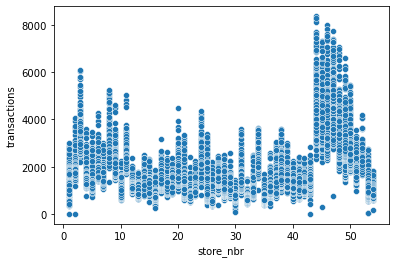

In [172]:
sns.scatterplot(data=df, 
                x="store_nbr",
                y="transactions")
plt.show()

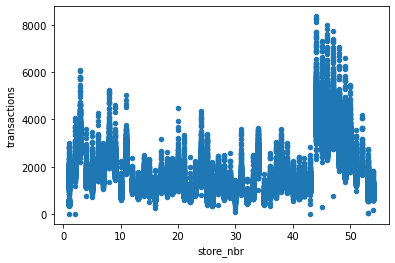

In [203]:
df.plot(x="store_nbr", y="transactions", kind="scatter") 
plt.show()

In [193]:
is_store = df["store_nbr"] == 20
df[is_store]

,date,store_nbr,transactions
36082,2015-02-13,20,4500
36131,2015-02-14,20,3698
36180,2015-02-15,20,3181
36229,2015-02-16,20,2915
36278,2015-02-17,20,2826
...,...,...,...
83237,2017-08-11,20,1751
83291,2017-08-12,20,1664
83345,2017-08-13,20,1834
83399,2017-08-14,20,1522


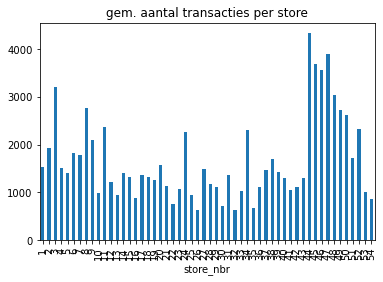

In [201]:
avg_trans_by_store = df.groupby("store_nbr")["transactions"].mean() 
avg_trans_by_store.plot(kind="bar", title="gem. aantal transacties per store", rot=90)
plt.show()

In [46]:
import_file = 'data/history_aggregated.parquet'
df = pd.read_parquet(import_file)
df.head(3)

,onpromotion,item_nbr,week,date,unit_sales_sum,count,family,class,perishable
0,False,764438,201323,2013-06-04 00:00:00+00:00,1925.0,180,GROCERY I,1072,0
1,False,764438,201324,2013-06-11 00:00:00+00:00,1516.0,164,GROCERY I,1072,0
2,False,764438,201325,2013-06-18 00:00:00+00:00,1656.0,176,GROCERY I,1072,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948220 entries, 0 to 948219
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   onpromotion     948220 non-null  bool               
 1   item_nbr        948220 non-null  int64              
 2   week            948220 non-null  int64              
 3   date            948220 non-null  datetime64[ns, UTC]
 4   unit_sales_sum  948220 non-null  float64            
 5   count           948220 non-null  int64              
 6   family          948220 non-null  category           
 7   class           948220 non-null  int64              
 8   perishable      948220 non-null  int64              
dtypes: bool(1), category(1), datetime64[ns, UTC](1), float64(1), int64(5)
memory usage: 52.5 MB


In [45]:
#WERKT NOG NIET: WELK DEEL VAN OMZET KOMT UIT VERS EN WELK DEEL VAN SCHAPPRODUCTEN? 
#wellicht eerst een selectie maken met while 
perishable = df.groupby(“perishable”)[“unit_sales_sum”].agg([sum])

SyntaxError: invalid character in identifier (<ipython-input-45-461e741ecc28>, line 2)

In [32]:
item = df.groupby("item_nbr")["unit_sales_sum"].agg([min, max, sum])
# MAAR HOE KAN IK NU SORTEREN OP MIN, MAX of SUM?? df.sort_values("....", ascending=True)

,min,max,sum
item_nbr,,,
96995,1.0,1005.0,10143.0
99197,1.0,735.0,17870.0
103501,1.0,1052.0,164753.0
103520,1.0,3724.0,201117.0
103665,1.0,1231.0,219669.0
...,...,...,...
2123863,3.0,14.0,17.0
2124052,41.0,1168.0,5466.0
2126842,7.0,12.0,19.0


In [11]:
df.groupby("item_nbr")["count"].mean()

item_nbr
96995       49.330189
99197       56.344828
103501     124.881533
103520     177.842809
103665     130.359173
              ...    
2123863      6.000000
2124052     64.000000
2126842      6.000000
2126944      2.500000
2127114     30.875000
Name: count, Length: 4036, dtype: float64

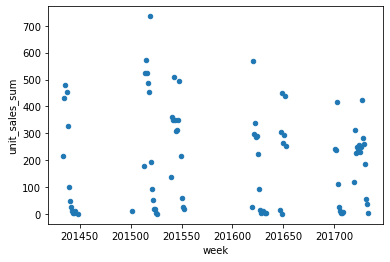

In [16]:
item_nr = pd.DataFrame(df.groupby('item_nbr').get_group(99197).reset_index()).drop('index', axis = 1)
item_nr.plot(x="week", y="unit_sales_sum", kind="scatter") 
plt.show()

In [20]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948220 entries, 0 to 948219
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   onpromotion     948220 non-null  bool               
 1   item_nbr        948220 non-null  int64              
 2   week            948220 non-null  int64              
 3   date            948220 non-null  datetime64[ns, UTC]
 4   unit_sales_sum  948220 non-null  float64            
 5   count           948220 non-null  int64              
 6   family          948220 non-null  category           
 7   class           948220 non-null  int64              
 8   perishable      948220 non-null  int64              
 9   year            948220 non-null  int64              
 10  month           948220 non-null  int64              
 11  day             948220 non-null  int64              
dtypes: bool(1), category(1), datetime64[ns, UTC](1), float64(1), int64(8)
me

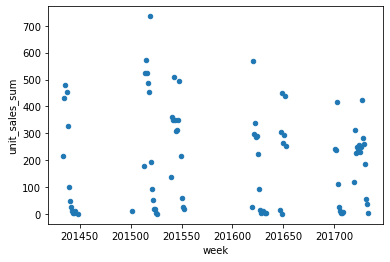

In [30]:
item_nr = pd.DataFrame(df.groupby('item_nbr').get_group(99197).reset_index()).drop('index', axis = 1)
item_nr.plot(x="week", y="unit_sales_sum", kind="scatter") 
plt.show()

In [32]:
item_nr[item_nr["year"] == 2016]

,onpromotion,item_nbr,week,date,unit_sales_sum,count,family,class,perishable,year,month,day
62,False,99197,201653,2016-01-01 00:00:00+00:00,254.0,95,GROCERY I,1067,0,2016,1,1
63,False,99197,201701,2016-01-10 00:00:00+00:00,241.0,83,GROCERY I,1067,0,2016,1,10
64,False,99197,201702,2016-01-17 00:00:00+00:00,239.0,76,GROCERY I,1067,0,2016,1,17
65,False,99197,201703,2016-01-24 00:00:00+00:00,418.0,90,GROCERY I,1067,0,2016,1,24
66,False,99197,201704,2016-01-31 00:00:00+00:00,111.0,53,GROCERY I,1067,0,2016,1,31
67,False,99197,201705,2016-02-07 00:00:00+00:00,25.0,19,GROCERY I,1067,0,2016,2,7
68,False,99197,201706,2016-02-14 00:00:00+00:00,13.0,11,GROCERY I,1067,0,2016,2,14
69,False,99197,201707,2016-02-21 00:00:00+00:00,4.0,4,GROCERY I,1067,0,2016,2,21
70,False,99197,201708,2016-02-28 00:00:00+00:00,5.0,5,GROCERY I,1067,0,2016,2,28
71,False,99197,201709,2016-03-06 00:00:00+00:00,7.0,7,GROCERY I,1067,0,2016,3,6


<AxesSubplot:xlabel='week', ylabel='unit_sales_sum'>

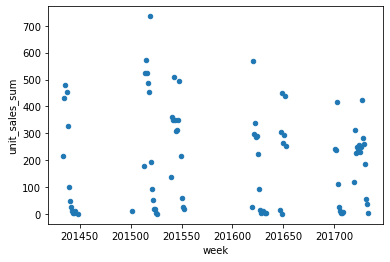

In [33]:
item_nr.plot(x="week", y="unit_sales_sum", kind="scatter") 

In [13]:
df.loc[df["item_nbr"] == 99197, "date"].agg(("min", "max"))

min   2014-08-20 00:00:00+00:00
max   2016-08-21 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [18]:
for i = 

          item                       min
0       764438 2013-06-04 00:00:00+00:00
1       764438 2013-06-11 00:00:00+00:00
2       764438 2013-06-18 00:00:00+00:00
3       764438 2013-06-25 00:00:00+00:00
4       764438 2013-07-02 00:00:00+00:00
...        ...                       ...
948215  764438 2013-04-30 00:00:00+00:00
948216  764438 2013-05-07 00:00:00+00:00
948217  764438 2013-05-14 00:00:00+00:00
948218  764438 2013-05-21 00:00:00+00:00
948219  764438 2013-05-28 00:00:00+00:00

[948220 rows x 2 columns]


In [22]:
df.item_nbr.min()

96995

In [21]:
df.item_nbr.max()

2127114

In [25]:
print(len(df.item_nbr))

948220


In [28]:
for (i = df.item_nbr.min() ; i = df.item_nbr.max() ; i++)
    df.loc[df["item_nbr"] == i, "date"].agg(("min", "max"))

SyntaxError: invalid syntax (<ipython-input-28-6e508bd13517>, line 1)

In [30]:
# per item_nbr startdatum van verkoop (in assortiment) en einddatum verkopen (wellicht uit assortiment of laatste dag dataset, dan 2016-08-21)
# er zijn vanaf 2013-01-01 tm 2016-08-21 in totaal 4036 artikelen in assortiment geweest
df.groupby("item_nbr")["date"].agg([min, max])

,min,max
item_nbr,,
96995,2013-01-01 00:00:00+00:00,2016-08-21 00:00:00+00:00
99197,2014-08-20 00:00:00+00:00,2016-08-21 00:00:00+00:00
103501,2013-01-01 00:00:00+00:00,2016-08-21 00:00:00+00:00
103520,2013-01-01 00:00:00+00:00,2016-08-21 00:00:00+00:00
103665,2013-01-01 00:00:00+00:00,2016-08-21 00:00:00+00:00
...,...,...
2123863,2016-08-14 00:00:00+00:00,2016-08-21 00:00:00+00:00
2124052,2015-12-04 00:00:00+00:00,2016-08-21 00:00:00+00:00
2126842,2016-08-14 00:00:00+00:00,2016-08-21 00:00:00+00:00


,min,max,sum
item_nbr,,,
96995,1.0,1005.0,10143.0
99197,1.0,735.0,17870.0
103501,1.0,1052.0,164753.0
103520,1.0,3724.0,201117.0
103665,1.0,1231.0,219669.0
...,...,...,...
2123863,3.0,14.0,17.0
2124052,41.0,1168.0,5466.0
2126842,7.0,12.0,19.0


In [49]:
import_file = 'data/history-per-year.parquet/year=2017/month=1/fdebd88b09554806ba53e4cb0ab9fb31.parquet'
df = pd.read_parquet(import_file)
df.head(25)

,id,store_nbr,item_nbr,unit_sales,onpromotion,day
0,101688779,25,99197,1.0,False,1
1,101688780,25,103665,7.0,False,1
2,101688781,25,105574,1.0,False,1
3,101688782,25,105857,4.0,False,1
4,101688783,25,106716,2.0,False,1
5,101688784,25,108698,2.0,False,1
6,101688785,25,108786,1.0,False,1
7,101688786,25,108797,1.0,False,1
8,101688787,25,108862,1.0,False,1
9,101688788,25,108952,2.0,False,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134770 entries, 0 to 3134769
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    uint8  
 2   item_nbr     int64  
 3   unit_sales   float64
 4   onpromotion  boolean
 5   day          uint8  
dtypes: boolean(1), float64(1), int64(2), uint8(2)
memory usage: 83.7 MB


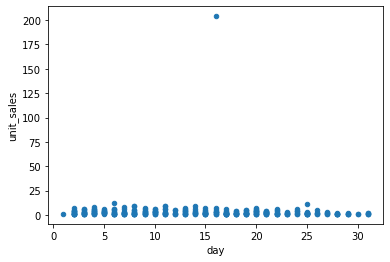

In [50]:
item_nr = pd.DataFrame(df.groupby('item_nbr').get_group(99197).reset_index()).drop('index', axis = 1)
item_nr.plot(x="day", y="unit_sales", kind="scatter") 
plt.show()

In [ ]:
item_nr = pd.DataFrame(df.groupby('item_nbr').get_group(99197).reset_index()).drop('index', axis = 1)
item_nr.plot(x="day", y="unit_sales", kind="scatter") 
plt.show()

In [ ]:
#descriptive statistics summary
df.describe()

In [ ]:
import_file = 'data/history-per-year.parquet/year=2013/month=1/47557eba72554e6ca025f623ea8615b4.parquet'
df = pd.read_parquet(import_file)
df

In [ ]:
#descriptive statistics summary
df.describe()

In [ ]:
df

In [ ]:
import glob